In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import joblib


In [10]:
# 1. Загрузка данных
data_path = r"D:\Эстер\с рс\Courses\ML Engineer\HWEster24\archive\penguins.csv"
df = pd.read_csv(data_path)

In [14]:
# 2. EDA (Анализ данных)
print("Доля пропущенных значений:\n", df.isna().mean())
print("Минимальное и максимальное значение:\n", df.describe().loc[["min", "max"]])
print("Среднее значение:\n", df.mean(numeric_only=True))
print("Медиана:\n", df.median(numeric_only=True))
print("Дисперсия:\n", df.var(numeric_only=True))
print("Квантили 0.1 и 0.9:\n", df.quantile([0.1, 0.9], numeric_only=True))
print("Квартиль 1 и 3:\n", df.quantile([0.25, 0.75], numeric_only=True))

# Удаление строк с пропущенными значениями
df.dropna(inplace=True)

# Кодирование категориального признака 'sex'
if 'sex' in df.columns:
    le = LabelEncoder()
    df["sex"] = le.fit_transform(df["sex"])

Доля пропущенных значений:
 culmen_length_mm     0.005814
culmen_depth_mm      0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.026163
dtype: float64
Минимальное и максимальное значение:
      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
min              32.1             13.1             -132.0       2700.0
max              59.6             21.5             5000.0       6300.0
Среднее значение:
 culmen_length_mm       43.921930
culmen_depth_mm        17.151170
flipper_length_mm     214.014620
body_mass_g          4201.754386
dtype: float64
Медиана:
 culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64
Дисперсия:
 culmen_length_mm         29.807054
culmen_depth_mm           3.899808
flipper_length_mm     67890.501252
body_mass_g          643131.077327
dtype: float64
Квантили 0.1 и 0.9:
      culmen_length_mm  culmen_depth_mm  flipper_length_mm  bo

In [15]:
# 3. Нормализация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["sex"]) if 'sex' in df.columns else df)

In [16]:
# 4. Кластеризация AgglomerativeClustering
best_ari = -1
best_params = None
best_labels = None

for n_clusters in range(2, 6):
    for linkage_method in ["ward", "complete", "average", "single"]:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        labels = model.fit_predict(scaled_features)
        if 'sex' in df.columns:
            ari = adjusted_rand_score(df["sex"], labels)
            if ari > best_ari:
                best_ari = ari
                best_params = (n_clusters, linkage_method)
                best_labels = labels

if best_params:
    print(f"Лучшая модель AgglomerativeClustering: {best_params}, ARI: {best_ari}")


Лучшая модель AgglomerativeClustering: (5, 'complete'), ARI: 0.28674168214693097


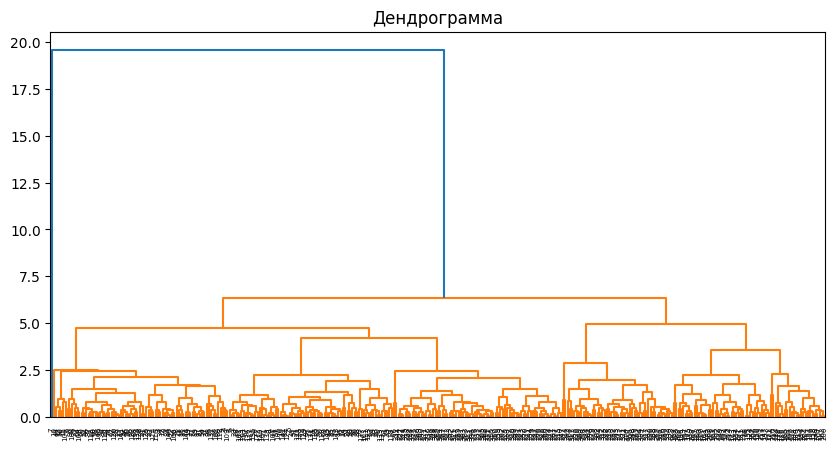

In [17]:
# 5. Построение дендрограммы
linked = linkage(scaled_features, method=best_params[1])
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Дендрограмма")
plt.show()

In [18]:
# 6. Сохранение модели
joblib.dump(AgglomerativeClustering(n_clusters=best_params[0], linkage=best_params[1]), "agglomerative_model.joblib")

['agglomerative_model.joblib']

In [19]:
# 7. Кластеризация DBSCAN
best_silhouette = -1
best_eps = None
best_min_samples = None
best_labels_dbscan = None

for eps in np.arange(0.2, 2.0, 0.2):
    for min_samples in range(2, 10):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(scaled_features)
        if len(set(labels)) > 1:  # Проверяем, что не один кластер
            silhouette = silhouette_score(scaled_features, labels)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples
                best_labels_dbscan = labels

if best_eps:
    print(f"Лучшая модель DBSCAN: eps={best_eps}, min_samples={best_min_samples}, Silhouette Score: {best_silhouette}")

Лучшая модель DBSCAN: eps=1.6, min_samples=2, Silhouette Score: 0.8763081160273638
